# Аналитика в авиакомпании

На предыдущих этапах нашего исследования мы сделали запроросы по базе данных авиакомпании "F9". Нашей главной задачей было проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
Мы получили файлы, в которых содержатся результаты запросов из предыдущих заданий. 

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года  

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

**Оглавление**

2. [Импорт и изучение данных](#preprocessing)
3. [Построение графиков](#graph)
    * [Города и количество рейсов](#flights)
    * [Топ-10 городов по количеству рейсов](#top10)
    * [Модели самолетов и количество рейсов](#models)
4. [Вывод](#finish)

# <a id="preprocessing">Импорт и изучение данных

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#чтение файла и вывод общей информации
flights_per_model = pd.read_csv('/datasets/query_1.csv')
flights_per_model.info()
flights_per_model.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [3]:
flights_per_model['flights_amount'] = flights_per_model['flights_amount'].astype('float16')

In [4]:
flights_per_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null float16
dtypes: float16(1), object(1)
memory usage: 208.0+ bytes


Рассмотрим вторую таблицу о среднем количестве рейсов, прибывающих в города

In [5]:
flights_per_city = pd.read_csv('/datasets/query_3.csv')
flights_per_city.info()
flights_per_city.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
#замена типа данных
flights_per_city['average_flights'] = flights_per_city['average_flights'].astype('float16')

In [7]:
flights_per_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float16
dtypes: float16(1), object(1)
memory usage: 1.1+ KB


Данные в двух таблицах имеют полные наборы без пропусков и представлены в верных форматах.

# <a id=" graph ">Построение графиков

## <a id=" flights ">Города и количество рейсов

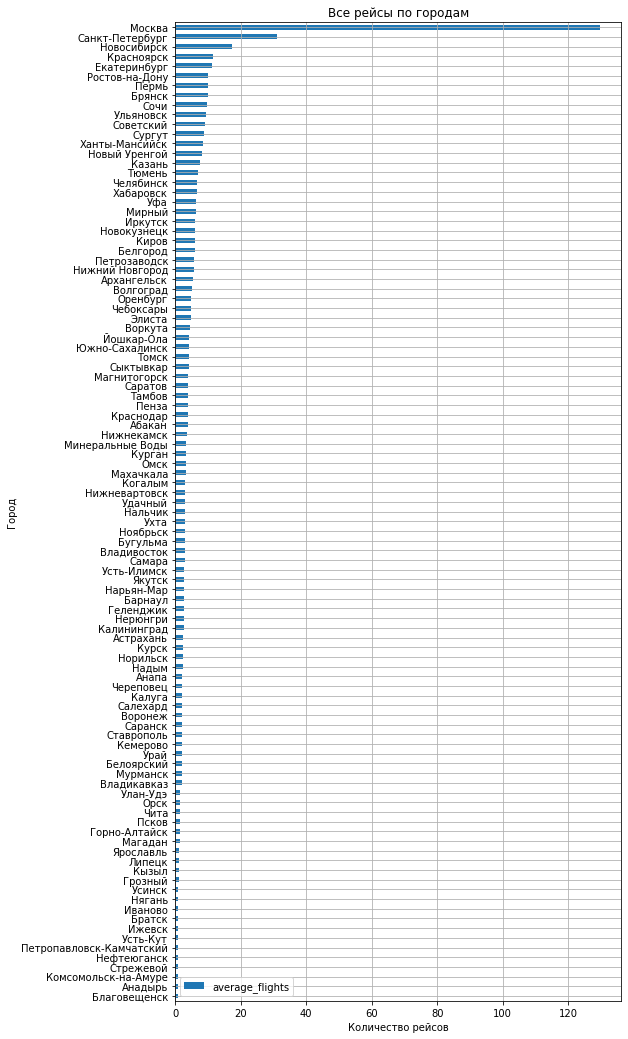

In [8]:
# Сортируем таблицу полетов и строим график
city = (flights_per_city.sort_values(by = 'average_flights')
            .plot(y='average_flights', x = 'city', kind='barh', grid=True, figsize=(8, 18))
           )            
plt.title("Все рейсы по городам") 
plt.xlabel("Количество рейсов")
plt.ylabel("Город") 
plt.show()

На графике мы видим все выполенные рейсы по городам в августе 2018 года. Показатель среднего количества рейсов выше всего в Москве, Санкт-Петербурге и Новосибирске. Ниже всего - в Комсомольск-на-Амуре, Анадыре и Благовещенске.

## <a id=" top10">Топ-10 городов по количеству рейсов

In [9]:
#функция для графиков с рейтингом
def rating(df, values, index):
    df = df
    
    plt.figure(figsize=(12,6))
    plt.bar(df[index], df[values])
    for i, val in enumerate(df[values].values):
        (
        plt.text(i, val, round(float(val), 2), horizontalalignment='center', verticalalignment='bottom', 
                 fontdict={'fontweight':500, 'size':12})
        ) 
    plt.xticks(rotation=90)
    plt.title(index + ' по ' + values) 
    plt.xlabel(index)
    plt.ylabel("Количество") 
    plt.show()

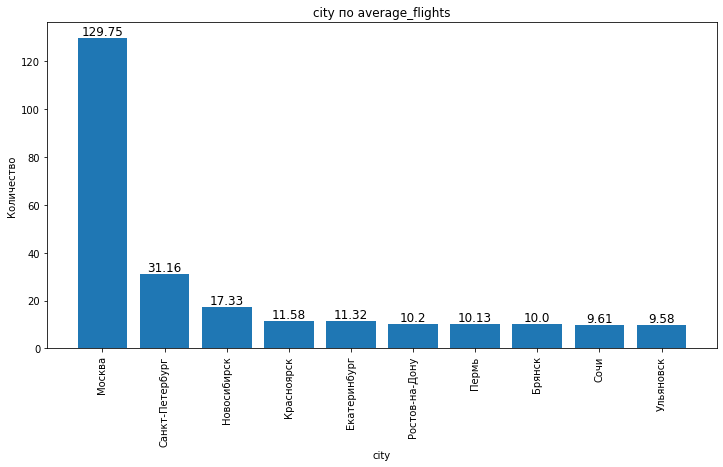

In [10]:
#Сортировка таблицы полетов и вывод графика по топ10
top_city = flights_per_city.sort_values(by = 'average_flights', ascending = False)
rating(top_city[:10], 'average_flights', 'city')

В августе 2018 наибольшей популярностью у пассажиров авиакомпании "F9" пользовалась Москва. На втором и третьем месте расположились Санкт-Петербург и Новосибирск. Остальные направления в топ-10 пользовались примерно одинаковой популрностью.

Предполагаем, что аэропорты Москвы и Санкт-Петербурга являются самыми загруженными в России. Москва лидирует еще и потому, что имеет три аэропорта. Часто эти аэропорты служат местом пересадок на другие направления.     
Следующие города в списке также являются крупными транспортными узлами в Сибире и Урале.  
Время сбора данных - август 2018 года. Конец лета - это время отпусков и крупные аэропорты используются как пересадочные узлы, и второе - в августе много студентов возвращаются на учебу, в топе города с лучшими вузами России. 

## <a id=" models ">Модели самолетов и количество рейсов

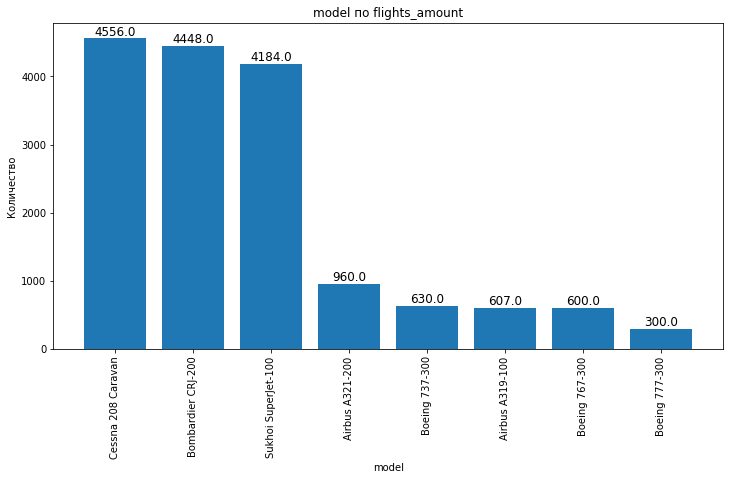

In [11]:
#Сортировка таблицы моделей самолетов по количеству полетов и вывод графика
flights_per_model_sort = flights_per_model.sort_values(by = 'flights_amount', ascending = False)
rating(flights_per_model_sort, 'flights_amount','model' )

Больше всего рейсов в сентябре 2018 года выполнялось самотетами моделей  "Cessna 208 Caravan" - 4557 рейсов, "Bombardier CRJ-200" - 4446 рейсов и "Sukhoi SuperJet-100"  - 4185 рейсов

# <a id=" finish ">Вывод

По полученным данным в ходе запросов мы построили несколько диаграмм. Так нам удалось выяснить, что в сентябре 2018 года больше всего рейсов выполнено в Москву (в среднем 129.7), Санкт-Петербург (31.2) и Новосибирск (17.3), а меньше всего - Комсомольск-на-Амуре, Анадырь и Благовещенск.
Больше всего рейсов в сентябре 2018 года выполнялось самолетами моделей "Bombardier CRJ-200" - 4446 рейсов, "Cessna 208 Caravan" - 4557 рейсов и "Sukhoi SuperJet-100"  - 4185 рейсов.  

В ходе подготовительной работы мы делали запрос по базе данных о фестивалях, которые проходили с 23 июля по 30 сентября 2018 года в Москве. Далее посчитали количество билетов, купленных на рейсы в Москву. К сожалению, по полученным данным некорректно проверять гипотезу о связи музыкальных фестивалей и спросом на авиабилеты методом Стьюдента, данных слишком мало. 